## Objetivo: Classificar a chance de ocorrer um assalto de acordo com a localização, mês, dia do mês e dia da semana.

## 1- Importando a base de dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/robertferro/delitos_NY_2020/master/2%20-%20EDA/dados_pre_processados.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
df.head()

,descricao_da_ofensa,data_da_ocorrencia,bairro,bairro_id,latitude,longitude,ano,dia,mes,dia_da_semana,dia_da_semana_id,fds,assalto
0,FELONY ASSAULT,2020-12-25,Bronx,0,40.808798,-73.916184,2020,25,12,Friday,0,0,1
1,ROBBERY,2020-12-22,Manhattan,2,40.845956,-73.937813,2020,22,12,Tuesday,5,0,1
2,FELONY ASSAULT,2020-12-21,Queens,3,40.682398,-73.840079,2020,21,12,Monday,1,0,1
3,FELONY ASSAULT,2020-12-10,Queens,3,40.689336,-73.800409,2020,10,12,Thursday,4,0,1
4,FORGERY,2020-12-09,Staten_Island,4,40.634708,-74.124241,2020,9,12,Wednesday,6,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140413 entries, 0 to 140412
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   descricao_da_ofensa  140376 non-null  object 
 1   data_da_ocorrencia   140413 non-null  object 
 2   bairro               140413 non-null  object 
 3   bairro_id            140413 non-null  int64  
 4   latitude             140413 non-null  float64
 5   longitude            140413 non-null  float64
 6   ano                  140413 non-null  int64  
 7   dia                  140413 non-null  int64  
 8   mes                  140413 non-null  int64  
 9   dia_da_semana        140413 non-null  object 
 10  dia_da_semana_id     140413 non-null  int64  
 11  fds                  140413 non-null  int64  
 12  assalto              140413 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 13.9+ MB


## 2- Preparaçao dos dados

 - Conventerndo a coluna data_da_ocorrencia para formato datetime

In [6]:
df["data_da_ocorrencia"] = pd.to_datetime(df["data_da_ocorrencia"] )

In [7]:
df.isna().sum()

descricao_da_ofensa    37
data_da_ocorrencia      0
bairro                  0
bairro_id               0
latitude                0
longitude               0
ano                     0
dia                     0
mes                     0
dia_da_semana           0
dia_da_semana_id        0
fds                     0
assalto                 0
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140376 entries, 0 to 140412
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   descricao_da_ofensa  140376 non-null  object        
 1   data_da_ocorrencia   140376 non-null  datetime64[ns]
 2   bairro               140376 non-null  object        
 3   bairro_id            140376 non-null  int64         
 4   latitude             140376 non-null  float64       
 5   longitude            140376 non-null  float64       
 6   ano                  140376 non-null  int64         
 7   dia                  140376 non-null  int64         
 8   mes                  140376 non-null  int64         
 9   dia_da_semana        140376 non-null  object        
 10  dia_da_semana_id     140376 non-null  int64         
 11  fds                  140376 non-null  int64         
 12  assalto              140376 non-null  int64         
dtypes: datetime64[

- Selecionando apenas os principais delitos.

In [10]:
df.descricao_da_ofensa.value_counts().head(10)

ASSAULT 3 & RELATED OFFENSES      23731
FELONY ASSAULT                    13475
PETIT LARCENY                     11406
DANGEROUS DRUGS                   11289
MISCELLANEOUS PENAL LAW            9133
ROBBERY                            7948
CRIMINAL MISCHIEF & RELATED OF     7831
DANGEROUS WEAPONS                  6710
GRAND LARCENY                      6542
BURGLARY                           6056
Name: descricao_da_ofensa, dtype: int64

In [11]:
lista_select = list(dict(df.descricao_da_ofensa.value_counts().head(10)).keys())

In [12]:
df = df.set_index('descricao_da_ofensa')
df = df.loc[lista_select]

In [13]:
df = df.reset_index()
df.descricao_da_ofensa.value_counts()

ASSAULT 3 & RELATED OFFENSES      23731
FELONY ASSAULT                    13475
PETIT LARCENY                     11406
DANGEROUS DRUGS                   11289
MISCELLANEOUS PENAL LAW            9133
ROBBERY                            7948
CRIMINAL MISCHIEF & RELATED OF     7831
DANGEROUS WEAPONS                  6710
GRAND LARCENY                      6542
BURGLARY                           6056
Name: descricao_da_ofensa, dtype: int64

 - Excluindo colunas que não serão utilizadas e renomeando o dataset.

In [14]:
dados = df.drop(columns=['ano','descricao_da_ofensa','bairro','dia_da_semana','data_da_ocorrencia'])

In [15]:
dados.shape

(104121, 8)

In [16]:
dados.assalto.value_counts()

0    52911
1    51210
Name: assalto, dtype: int64

# 3 - Modelagem

## 3.1 Preparação dos Dados
- Separação Treino/Teste
- Separar Dados de Entrada (Atributos) e de saída (target)
- Tratar colunas categóricas
- Tratar dados ausentes


In [17]:
dados.head()

,bairro_id,latitude,longitude,dia,mes,dia_da_semana_id,fds,assalto
0,0,40.822298,-73.911694,20,10,5,0,1
1,3,40.697730,-73.845596,15,10,4,0,1
2,2,40.800846,-73.949030,30,9,6,0,1
3,0,40.838551,-73.909399,29,8,2,1,1
4,0,40.858584,-73.908696,9,8,3,1,1


In [18]:
dados_ml = dados.copy()

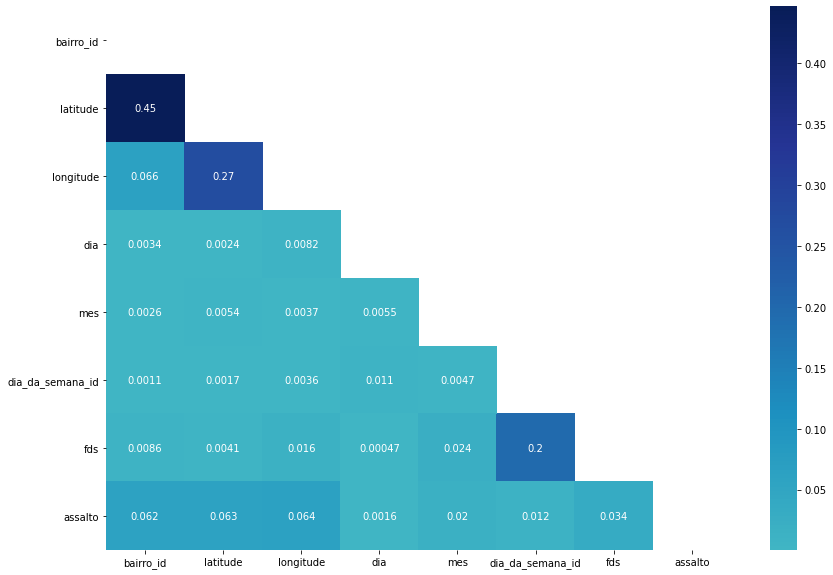

In [19]:
plt.figure(figsize=(14,10))

corr = dados_ml.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

Separando as variaveis em X e Y

In [20]:
dados_ml.assalto.value_counts()

0    52911
1    51210
Name: assalto, dtype: int64

In [21]:
X = dados_ml.drop(columns='assalto',axis=1)
Y = dados_ml['assalto']


Separando em amostras de treino e teste

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_treino,X_teste,Y_treino,Y_teste = train_test_split(X,Y,test_size=0.25,random_state=123,stratify=Y )

 - Criando um Benchmark

In [24]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_treino, Y_treino)
y_pred = dummy_clf.predict(X_teste)
acuracia = dummy_clf.score(X_teste, Y_teste) * 100

print('A acurácia do dummy mostfrequent foi %.2f%%' % acuracia)

A acurácia do dummy mostfrequent foi 50.82%


Text(33.0, 0.5, 'Real ( 1 ou 0)')

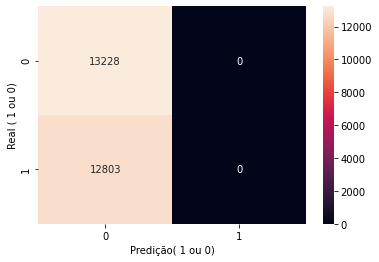

In [25]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [26]:
from sklearn.metrics import  roc_auc_score,roc_curve
from sklearn import metrics

y_proba = dummy_clf.predict_proba(X_teste)
roc_auc_score(Y_teste, y_proba[:, 1])

0.5

 - Fazendo uma triagem com outros modelos

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [28]:
lista_classificacores = [ LogisticRegression(),
                         DecisionTreeClassifier(),
                         RandomForestClassifier(),
                         XGBClassifier()]

for clf in lista_classificacores:
  print(clf.__class__.__name__)
  clf.fit(X_treino, Y_treino)

  print('Acuracia')
  train_acc = clf.score(X_treino, Y_treino)
  test_acc = clf.score(X_teste, Y_teste)
  print('Treino:', train_acc)
  print('Teste:', test_acc)

  print('ROC AUC')

  y_proba_treino = clf.predict_proba(X_treino)
  roc_treino = roc_auc_score(Y_treino, y_proba_treino[:, 1])
  print('Treino', roc_treino)

  y_proba_teste = clf.predict_proba(X_teste)
  roc_teste = roc_auc_score(Y_teste, y_proba_teste[:, 1])
  print('Test', roc_teste)
  print('='*80)

LogisticRegression
Acuracia
Treino: 0.5372903060571136
Teste: 0.5372056394299105
ROC AUC
Treino 0.5506157390479652
Test 0.551237796242428
DecisionTreeClassifier
Acuracia
Treino: 0.9463439620950186
Teste: 0.6478429564749721
ROC AUC
Treino 0.9936196839317332
Test 0.6598572377566576
RandomForestClassifier
Acuracia
Treino: 0.9463311563580484
Teste: 0.662978756098498
ROC AUC
Treino 0.9906002997309278
Test 0.733776599645518
XGBClassifier
Acuracia
Treino: 0.5939941093609937
Teste: 0.5868003534247628
ROC AUC
Treino 0.6367598230426621
Test 0.625018980493426


In [29]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score
lista_classificacores = [ LogisticRegression(),
                         DecisionTreeClassifier(),
                         RandomForestClassifier(),
                         XGBClassifier()]


for clf in lista_classificacores:
  print(clf.__class__.__name__)
  clf.fit(X_treino, Y_treino)
  train_acc = clf.score(X_treino, Y_treino)
  val_score = cross_val_score(clf, X_treino, Y_treino, cv=5)
  test_acc = clf.score(X_teste, Y_teste)
  print('Treino:', train_acc)
  print('Validation score', val_score.mean())
  print('Teste:', test_acc)

  print('ROC AUC')

  y_proba_treino = clf.predict_proba(X_treino)
  roc_treino = roc_auc_score(Y_treino, y_proba_treino[:, 1])
  print('Treino', roc_treino)

  y_proba_teste = clf.predict_proba(X_teste)
  roc_teste = roc_auc_score(Y_teste, y_proba_teste[:, 1])
  print('Test', roc_teste)
  print('='*80)


LogisticRegression
Treino: 0.5372903060571136
Validation score 0.5371750544243821
Teste: 0.5372056394299105
ROC AUC
Treino 0.5506157390479652
Test 0.551237796242428
DecisionTreeClassifier
Treino: 0.9463439620950186
Validation score 0.6296965040338072
Teste: 0.6458069225154623
ROC AUC
Treino 0.9936196839317332
Test 0.6575497482600239
RandomForestClassifier
Treino: 0.9463439620950186
Validation score 0.6436803688052247
Teste: 0.6619031155161154
ROC AUC
Treino 0.9906419871479969
Test 0.7332089267141213
XGBClassifier
Treino: 0.5939941093609937
Validation score 0.5876168523498528
Teste: 0.5868003534247628
ROC AUC
Treino 0.6367598230426621
Test 0.625018980493426


- Treinando o melhor modelo.


In [30]:
modelo = RandomForestClassifier()

In [31]:
modelo.fit(X_treino, Y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
Y_previsto = modelo.predict(X_teste)

 - Gerando a matriz de confusão

Text(33.0, 0.5, 'Real ( 1 ou 0)')

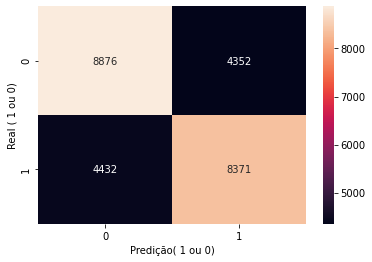

In [35]:
cm=confusion_matrix(Y_teste,y_proba[:, 1]>0.5)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

In [34]:
y_proba = modelo.predict_proba(X_teste)
roc_auc_score(Y_teste, y_proba[:, 1])

0.7322871962816961

In [36]:
from sklearn.metrics import classification_report
print(classification_report(Y_teste, Y_previsto))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67     13228
           1       0.66      0.65      0.66     12803

    accuracy                           0.66     26031
   macro avg       0.66      0.66      0.66     26031
weighted avg       0.66      0.66      0.66     26031



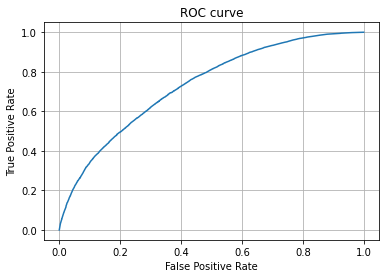

In [37]:
fpr, tpr, thresholds = metrics.roc_curve(Y_teste, y_proba[:,1])
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

## Melhorando o modelo.

In [38]:
Y_previsto[0:10]

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0])

In [39]:
y_proba[0:10,1]

array([0.        , 0.37      , 0.165     , 0.74711111, 0.55      ,
       0.79333333, 0.04      , 0.33783333, 0.62      , 0.2165    ])

In [40]:
#  Armazenando as probabilidade de predição para a calsse 1
y_pred_proba = modelo.predict_proba(X_teste)[:,1]

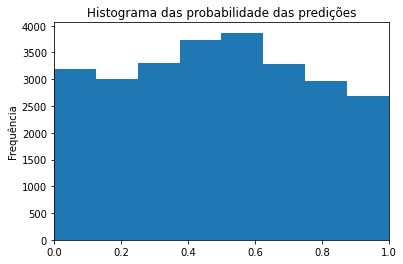

In [41]:
#  histograma das probabilidade de predição

plt.hist(y_pred_proba, bins = 8)
plt.xlim(0,1)
plt.title('Histograma das probabilidade das predições')
plt.ylabel("Frequência")
plt.show()

In [42]:
#  predizendo se a probabilidade for maior que 0.37


from sklearn.preprocessing import binarize
y_pred = binarize([y_pred_proba], 0.37)[0]

Text(33.0, 0.5, 'Real ( 1 ou 0)')

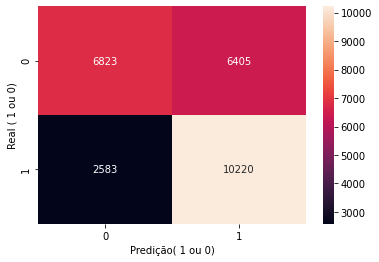

In [43]:
cm=confusion_matrix(Y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

- Após o ajuste conseguimos chegar em um número onsiderávelmente bom, visto que o objetivo do projeto e classificar possíveis áreas de assalto, com intuito de mobilizar mais policiamento pra área a fim de evitar esses delitos, ou mesmo as pessoas evitarem circular em determinados locais dependendo do dia, mês e dia da semana.




In [44]:
roc_auc_score(Y_teste,y_pred)

0.6570251143134095

In [45]:
print(classification_report(Y_teste, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.52      0.60     13228
           1       0.61      0.80      0.69     12803

    accuracy                           0.65     26031
   macro avg       0.67      0.66      0.65     26031
weighted avg       0.67      0.65      0.65     26031



In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics

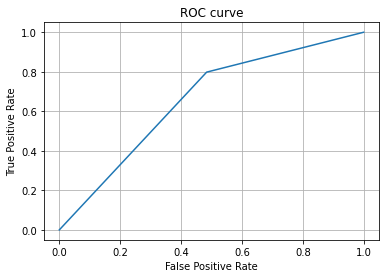

In [47]:
fpr, tpr, thresholds = metrics.roc_curve(Y_teste, y_pred)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()

- Salvando o modelo.

In [48]:
import pickle

output = open('modelo_previsao_assalto', 'wb')
pickle.dump(modelo, output)
output.close()